#### [Chapter 19](https://github.com/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_19.ipynb)
<!-- - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ziaeemehr/mndynamics/main?labpath=mndynamics%2Fexamples%2FChap_19.ipynb) -->

**Bursting**

- Börgers, C., 2017. An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.

Code by : Abolfazl Ziaeemehr ([GitHub](https://github.com/Ziaeemehr))

<a href="https://colab.research.google.com/github/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment and run this line to install the package in colab
# !pip install "git+https://github.com/Ziaeemehr/mndynamics.git"

In [2]:
import os
import warnings
import numpy as np 
import matplotlib.pyplot as plt
from mndynamics.models.py.Inapik_Base import Inapik

warnings.filterwarnings("ignore")

# if not os.path.exists('output'):
#     os.makedirs('output')

In [3]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['figure.figsize'] = [7, 5]

In [4]:
obj = Inapik()
obj()

Inapik neuron model


{'cm': 1.0,
 'g_k': 10.0,
 'g_na': 20.0,
 'g_l': 8.0,
 'v_k': -90.0,
 'v_na': 60.0,
 'v_l': -80.0,
 'tau_n': 0.15,
 'tau_n_slow': 20.0,
 'g_k_slow': 5.0,
 'v_thr': -20.0,
 'i_ext': 7.0,
 't_end': 100.0,
 'v0': -70.0,
 'dt': 0.01}

In [5]:
data = obj.simulate()
data.keys()

dict_keys(['t', 'v', 'n', 'n_slow'])

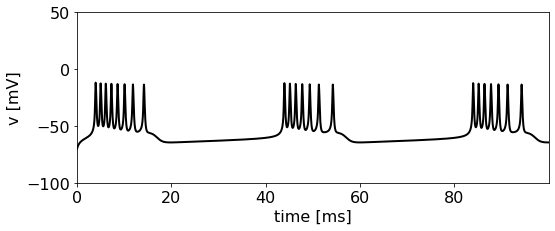

In [6]:
t = data["t"]
v = data["v"]

fig, ax = plt.subplots(1, figsize=(8, 3.5))
ax.plot(t, v, lw=2, c="k")


ax.set_xlim(min(t), max(t))
ax.set_ylim(-100, 50)
ax.set_xlabel("time [ms]")
ax.set_ylabel("v [mV]")
ax.set_yticks(range(-100, 100, 50))
plt.tight_layout()

In [7]:
obj = Inapik({"i_ext": 7.0, "t_end":1500})
data = obj.simulate()
t = data["t"]
v = data["v"]
n = data["n"]
n_slow = data["n_slow"]

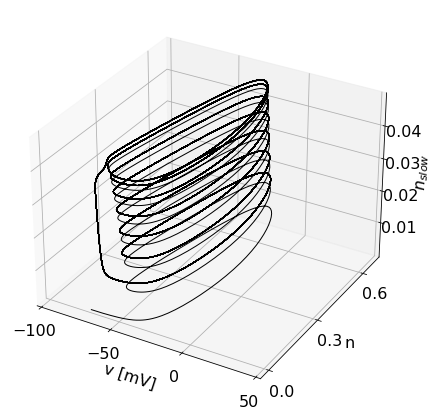

In [8]:
# 3D plot (v, n, n_slow)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(v, n, n_slow, lw=1, c="k")
ax.set_xlabel("v [mV]")
ax.set_ylabel("n")
ax.set_zlabel(r"$n_{slow}$")
ax.set_xlim(-100, 50)
ax.set_yticks([0, 0.3, 0.6])
ax.set_xticks([-100, -50, 0, 50])
plt.tight_layout()


- INAPIK_PLUS_WEAK_SLOW_I_K

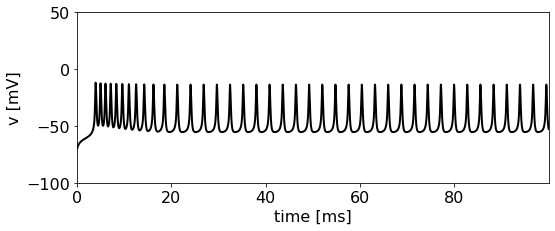

In [9]:
obj = Inapik({"t_end":100, "g_k_slow": 4.0})
data = obj.simulate()
t = data["t"]
v = data["v"]

fig, ax = plt.subplots(1, figsize=(8, 3.5))
ax.plot(t, v, lw=2, c="k")
ax.set_xlim(min(t), max(t))
ax.set_ylim(-100, 50)
ax.set_xlabel("time [ms]")
ax.set_ylabel("v [mV]")
ax.set_yticks(range(-100, 100, 50))
plt.tight_layout()

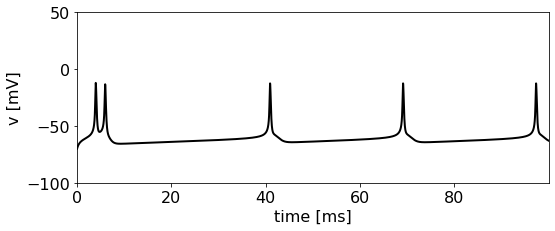

In [10]:
obj = Inapik({"t_end":100, "g_k_slow": 20.0})
data = obj.simulate()
t = data["t"]
v = data["v"]

fig, ax = plt.subplots(1, figsize=(8, 3.5))
ax.plot(t, v, lw=2, c="k")
ax.set_xlim(min(t), max(t))
ax.set_ylim(-100, 50)
ax.set_xlabel("time [ms]")
ax.set_ylabel("v [mV]")
ax.set_yticks(range(-100, 100, 50))
plt.tight_layout()

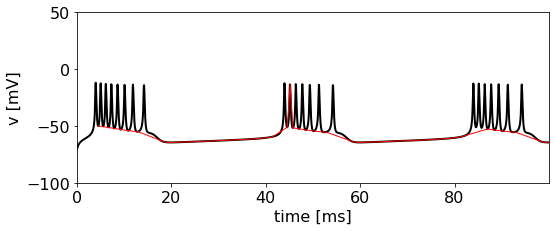

In [11]:
obj = Inapik({"t_end":100, 'dt':0.05})
data = obj.simulate()
t = data["t"]
v = data["v"]
dt = obj.dt

v_left = v[:-1]
v_right = v[1:]
ind = np.where(np.abs((v_right-v_left)/dt)<1.)[0]

fig, ax = plt.subplots(1, figsize=(8, 3.5))
ax.plot(t, v, lw=2, c="k")
ax.plot(t[ind+1], v[ind+1], c="r", lw=1)
ax.set_xlim(min(t), max(t))
ax.set_ylim(-100, 50)
ax.set_xlabel("time [ms]")
ax.set_ylabel("v [mV]")
ax.set_yticks(range(-100, 100, 50))
plt.tight_layout()

- INAPIK_SHOW_SLOW_I_K

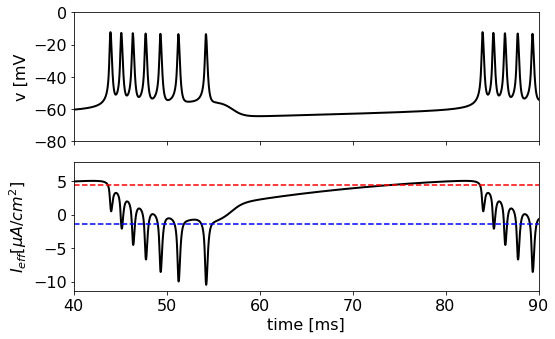

In [12]:
obj = Inapik()
data = obj.simulate()
t = data["t"]
v = data["v"]
n_slow = data['n_slow']


y = obj.i_ext + obj.g_k_slow * n_slow * (obj.v_k - v) 


fig, ax = plt.subplots(2, figsize=(8, 5), sharex=True)
ax[0].plot(t, v, lw=2, c="k")
ax[0].set_xlim([40, 90])
ax[0].set_ylim([-80, 0])
ax[0].set_ylabel('v [mV')

ax[1].plot(t, y, lw=2, c="k")
ax[1].axhline(-1.4, c="b", ls="--")
ax[1].axhline(4.5, c="r", ls="--")
ax[1].set_ylabel(r"$I_{eff} [\mu A / cm^2] $")
ax[1].set_xlabel("time [ms]")
plt.tight_layout()

# 4.5 and -1.4 are roughly the values of I_c and I_star,
# respectively, that is, the critical values for
# the two bifurcations. Great precision would not
# be useful here.
                                                

- ERISIR_PLUS_SLOW_I_K

In [13]:
from mndynamics.models.py.Erisir_Base import Erisir_Burst
obj = Erisir_Burst({'t_end':1000})
obj()

Bursty Erisir Model


{'c': 1.0,
 'g_k': 224.0,
 'g_na': 112.0,
 'g_l': 0.5,
 'v_k': -90.0,
 'v_na': 60.0,
 'v_l': -70.0,
 'v_thr': -20.0,
 'i_ext': 7.5,
 't_end': 1000,
 'v0': -70.0,
 'dt': 0.01,
 'g_k_slow': 1.5,
 'tau_n_slow': 100.0}

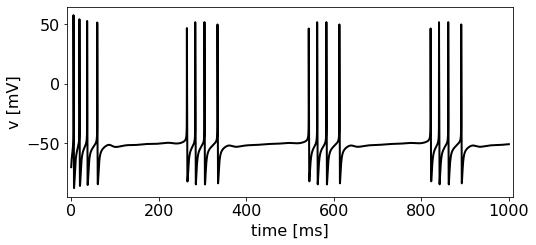

In [16]:
data = obj.simulate()
t = data['t']
v = data['v']

fig, ax = plt.subplots(1, figsize=(8, 3.5))
ax.plot(t, v, lw=2, c="k")
ax.set_xlabel("time [ms]")
ax.set_ylabel("v [mV]")
ax.margins(x=0.01)


- ERISIR_SHOW_SLOW_I_K

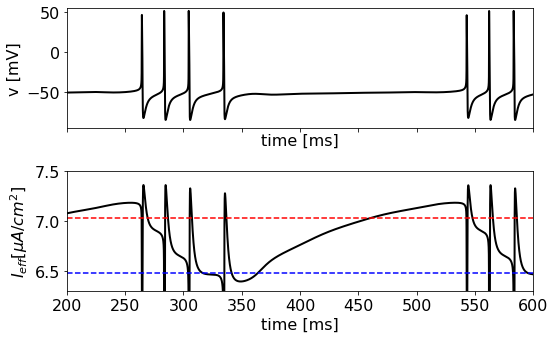

In [22]:
obj = Erisir_Burst({'t_end':1000})

data = obj.simulate()
t = data['t']
v = data['v']
n_slow = data['n_slow']

fig, ax = plt.subplots(2, figsize=(8, 5), sharex=True)
ax[0].plot(t, v, lw=2, c="k")
ax[0].set_xlabel("time [ms]")
ax[0].set_ylabel("v [mV]")
ax[0].set_xlim([200,600])
ax[0].set_ylim([-95, 55])
ax[0].margins(x=0.01)

y = obj.i_ext + obj.g_k_slow * n_slow * (obj.v_k - v)
ax[1].plot(t, y, lw=2, c="k")
ax[1].set_xlabel("time [ms]")
ax[1].set_ylim([6.3,7.5])
ax[1].set_ylabel(r"$I_{eff} [\mu A / cm^2] $")
ax[1].axhline(7.025, c="r", ls="--")
ax[1].axhline(6.475, c="b", ls="--")
plt.tight_layout()
